# 1. Get Reviews from Amazon

## 1.1 Set up Beautiful Soup and Requests

In [1]:
!pip install requests-html

     ---------------------------------------- 0.0/50.5 kB ? eta -:--:--
     ---------------------------------------- 50.5/50.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/83.4 kB ? eta -:--:--
     ---------------------------------------- 83.4/83.4 kB ? eta 0:00:00
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
  Using cached lxml-4.9.2-cp310-cp310-win_amd64.whl (3.8 MB)
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)
  Running setup.py install for parse: started
  Running setup.py install for parse: finished with status 'done'
  Running setup.py install for bs4: started
  Running setup.py install for bs4: finished with status 'done'


  DEPRECATION: parse is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: bs4 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import re
import time

In [3]:
class Reviews:
    def __init__(self, asin, hedders) -> None:
        self.asin = asin
        self.session = HTMLSession()
        self.headers = hedders
        self.url = f'https://www.amazon.co.uk/product-reviews/{self.asin}/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber='
        
    def pagination(self, page):
        r = self.session.get(self.url + str(page))
        if not r.html.find('div[data-hook=review]'):
            return False
        else:
            return r.html.find('div[data-hook=review]')
        
    def parse(self, reviews):
        total = []
        for review in reviews:
            title = review.find('a[data-hook=review-title]', first=True).text
            rating = review.find('i[data-hook=review-star-rating] span', first=True).text
            body = review.find('span[data-hook=review-body]', first=True).text.replace('\n', '').strip()
            
            data = {
                'title': title,
                'rating': rating,
                'body': body
            }
            total.append(data)
        return total

In [4]:
amz = Reviews('B0779B2K8B', HEDDERS)
results = []
for x in range(1, 5):
    reviews = amz.pagination(x)
    if reviews is not False:
        print(f'Getting Page {x}')
        time.sleep(0.3)
        results.append(amz.parse(reviews))
    else:
        print('No more pages')
        break

No more pages


In [8]:
# Set up hedder to Scrape Amazon
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [24]:
HEADERS = {"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7", 
           "Accept-Encoding": "gzip, deflate", 
           "Dnt": "1", 
           "Sec-Gpc": "1", 
           "Upgrade-Insecure-Requests": "1", 
           "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36", 
           "X-Amzn-Trace-Id": "Root=1-643fd868-3ca2c6ce01ed0a2f34795b57"}

## 1.2 Convert Text to Soup

In [25]:
link = "https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"

In [26]:
html = requests.get(link, headers=HEADERS)

In [27]:
# Create Soup object from html Data
soup = BeautifulSoup(html.text, 'html.parser')

In [16]:
with open("example.html", 'w', encoding="utf-8") as f:
    f.write(str(html))

In [33]:
# Find user reviews in the data
results = soup.find_all('span', {'data-hook': 'review-body'})
print(len(results))

10


## 1.3 Scraping Multible Pages

In [40]:
link = "https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews"

In [41]:
# Construct list of links to scrape multiple pages
links = []
for x in range(1,5):
    links.append(link + '&pageNumber=' + str(x))

In [42]:
for link in links:
    print(link)

https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=4


In [43]:
# Scrape all links in the constructed list
reviews = []
for link in links:
    html = requests.get(link, headers=HEADERS)
    if html.status_code == 200:
        # HTML response was sucssesfull
        soup = BeautifulSoup(html.text, 'html.parser')
        results = soup.find_all('span', {'data-hook': 'review-body'})
        print(len(results))
        for review in results:
            reviews.append(review.text.replace('\n', ''))
    else:
        # HTML response was unsuccsessfull
        print('[BAD HTML RESPONSE] Response Code =', html.status_code)

10
10
10
10


# 2. Translate Reviews

## 2.1 Determine Language of Reviews

In [171]:
!pip install detectlanguage pandas

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached numpy-1.24.1-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


In [93]:
import detectlanguage
import pandas as pd

In [94]:
# Setup the API key
detectlanguage.configuration.api_key = "Secret"

In [96]:
# Test API to detect languages
review = reviews[10]
language = detectlanguage.detect(review)
print(review, '|' ,language[0]['language'])

Ich hab das Set 3 mal bekommen . Das erste war nach 5 Monaten hinüber, das zweite nach einem Tag und das letzte nach 1Std. Jetzt war es mir zu doof die 3te Maschine auch wieder zurück zu senden, habe deshalb das Teil was defekt war im Internet bestellt und von Amazon eine Gutschrift bekommen. Trotz allem, ist man von Makita besseres Gewohnt. Hab noch eine Akkuflex gekauft mal sehen wie lange diese hält. Info kommt. | de


In [112]:
regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [130]:
reviews[83]

'Habe diesen Akku Schrauber als Geschenk zu Weihnachten gekauft.Nach Erhalt habe ich ihn natürlich gleich geöffnet, da in anderen Rezensionen zu lesen war, das einige Teile fehlten....und siehe da...auch bei meiner Bestellung fehlten 2 Bohrer ...welches mir unbegreiflich ist...da ja alles verpackt ist. Habe dann versucht bei Makita an zu rufen...da warte ich immer noch auf einen Rückruf....und habe auch versucht schriftlich etwas zu erreichen.....schade....hat auch nicht funktioniert. Es sind ja nur 2 fehlende Bohrer...aber für den Preis kann man schon erwarten, das das Zubehöhr vollständig dabei ist. War schon enttäuscht und finde es traurig das Makita es nicht  nötig hat, zu mindestens zurück zu rufen.'

In [125]:
filterd_reviews = []
for idx, review in enumerate(reviews):
    temp = regrex_pattern.sub(r'', review)
    if temp == '':
        pass
    else:
        filterd_reviews.append(temp)

In [131]:
filterd_reviews[82]

'Habe diesen Akku Schrauber als Geschenk zu Weihnachten gekauft.Nach Erhalt habe ich ihn natürlich gleich geöffnet, da in anderen Rezensionen zu lesen war, das einige Teile fehlten....und siehe da...auch bei meiner Bestellung fehlten 2 Bohrer ...welches mir unbegreiflich ist...da ja alles verpackt ist. Habe dann versucht bei Makita an zu rufen...da warte ich immer noch auf einen Rückruf....und habe auch versucht schriftlich etwas zu erreichen.....schade....hat auch nicht funktioniert. Es sind ja nur 2 fehlende Bohrer...aber für den Preis kann man schon erwarten, das das Zubehöhr vollständig dabei ist. War schon enttäuscht und finde es traurig das Makita es nicht  nötig hat, zu mindestens zurück zu rufen.'

In [132]:
# Detect languges of all reviews
languages = []
for review in filterd_reviews:
    language = detectlanguage.detect(review)
    languages.append(language[0]['language'])

In [133]:
len(languages)

829

In [134]:
# Construct Data frame containing review and Language
df = pd.DataFrame({'Review': filterd_reviews, 'Language': languages})

In [135]:
df['Language'].value_counts()

de    402
en    277
fr     70
it     46
es     20
nl      4
da      2
pl      2
et      2
pt      2
ie      1
sr      1
Name: Language, dtype: int64

In [136]:
# Save df as csv
df.to_csv('Data/Reviews.csv')

## 2.2 Translate reviews

In [31]:
!pip install deepl

In [2]:
import deepl
import pandas as pd

In [11]:
# Read csv
df = pd.read_csv('Data/Reviews.csv', index_col=0)

In [12]:
deepl_auth_key = 'Secret'
translator = deepl.Translator(deepl_auth_key)

In [13]:
review = df.iloc[0,0]
language = df.iloc[0,1]
translated = translator.translate_text(review, target_lang='en-gb')
print(review, '|' ,translated)

Ich hab das Set 3 mal bekommen . Das erste war nach 5 Monaten hinüber, das zweite nach einem Tag und das letzte nach 1Std. Jetzt war es mir zu doof die 3te Maschine auch wieder zurück zu senden, habe deshalb das Teil was defekt war im Internet bestellt und von Amazon eine Gutschrift bekommen. Trotz allem, ist man von Makita besseres Gewohnt. Hab noch eine Akkuflex gekauft mal sehen wie lange diese hält. Info kommt. | I got the set 3 times. The first was broken after 5 months, the second after one day and the last after 1 hour. Now it was too stupid for me to send the third machine back, so I ordered the defective part on the internet and got a credit note from Amazon. Despite everything, I'm used to better from Makita. I bought another Akkuflex and will see how long it lasts. Info coming.


In [24]:
# Translate reviews
translations = []
for row in df.iterrows():
    review = row[1][0]
    language = row[1][1]
    if language == 'en':
        translation = review
    elif language in ['ie', 'sr']:
        translation = 'language not supported'
    else:
        translation = 'test'
        translation = translator.translate_text(review, target_lang='en-gb', source_lang=language)
        
    translations.append(translation)

In [25]:
len(translations)

829

In [26]:
# Add Translation to dataframe
df['Translated'] = translations

In [27]:
df.to_csv('Data/Reviews_Translated.csv')

# 3. Analysing the Reviews

## 3.1 Callculating Text Metrics

In [4]:
df = pd.read_csv('Data/Reviews_Translated.csv', index_col=0)

In [28]:
df.head()

,Review,Language,Translated
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...


In [29]:
df['Word_Count'] = df['Translated'].apply(lambda x: len(str(x).split()))
df['Char_Count'] = df['Translated'].str.len()

In [31]:
df.head()

,Review,Language,Translated,Word_Count,Char_Count
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN


## 3.2 Counting Stopwords

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
stop_words = stopwords.words('english')

In [54]:
df['Stop-Words'] = df['Translated'].apply(lambda x: len([x for x in str(x).split() if x in stop_words]))

In [55]:
df.head()

,Review,Language,Translated,Word_Count,Char_Count,Stop-Words
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN,28
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN,28
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN,47
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN,18
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN,31


In [62]:
print(df.iloc[2]['Translated'])

I ordered the case as a gift for my husband because we already had good experiences with Makita. I was convinced by the look and of course the good content for the price. The aluminium case is super sturdy and keeps everything safe and well stored. Both batteries work perfectly and so does the machine so far. You get here super quality and everything you need as a leihe at home for the beginning at a good price.1 star deduction only because I unfortunately can not report anything about the life as we own it only for 2 months.


# 4. Preprocessing

## 4.1 Lowercase all Words

In [63]:
df.columns

Index(['Review', 'Language', 'Translated', 'Word_Count', 'Char_Count',
       'Stop-Words'],
      dtype='object')

In [66]:
df['Translated_Lower'] = df['Translated'].apply(
    lambda x: " ".join(str(x).lower() for x in str(x).split()))

In [67]:
df.head()

,Review,Language,Translated,Word_Count,Char_Count,Stop-Words,Translated_Lower
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN,28,i got the set 3 times. the first was broken af...
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN,28,the makita case keeps its promise. even though...
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN,47,i ordered the case as a gift for my husband be...
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN,18,it is already our third tool of this type and ...
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN,31,the purchased makita cordless screwdriver conv...


## 4.2 Stripping Punctuation

In [71]:
df['Translated_Nopunc'] = df['Translated_Lower'].str.replace('[^\w\s]',' ')

C:\Users\leonr\AppData\Local\Temp\ipykernel_25900\2592959188.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Translated_Nopunc'] = df['Translated_Lower'].str.replace('[^\w\s]',' ')


In [72]:
df.head(10)

,Review,Language,Translated,Word_Count,Char_Count,Stop-Words,Translated_Lower,Translated_Nopunc
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN,28,i got the set 3 times. the first was broken af...,i got the set 3 times the first was broken af...
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN,28,the makita case keeps its promise. even though...,the makita case keeps its promise even though...
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN,47,i ordered the case as a gift for my husband be...,i ordered the case as a gift for my husband be...
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN,18,it is already our third tool of this type and ...,it is already our third tool of this type and ...
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN,31,the purchased makita cordless screwdriver conv...,the purchased makita cordless screwdriver conv...
5,Impressive tool.Totally recommendable.BR,en,Impressive tool.Totally recommendable.BR,3,40.0,0,impressive tool.totally recommendable.br,impressive tool totally recommendable br
6,Preisleistung passt Makita halt gerne wieder,de,Price performance fits Makita just gladly again,7,NaN,2,price performance fits makita just gladly again,price performance fits makita just gladly again
7,Guter Akkuschrauber der bisher gute Leistung g...,de,Good cordless screwdriver that has performed w...,25,NaN,10,good cordless screwdriver that has performed w...,good cordless screwdriver that has performed w...
8,alles ok.,da,Everything's fine.,2,NaN,0,everything's fine.,everything s fine
9,Macht was es soll,de,Does what it should,4,NaN,3,does what it should,does what it should


## 4.3 Removing Stopwords

In [73]:
df['Translated_Nostop'] = df['Translated_Nopunc'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [74]:
df.head()

,Review,Language,Translated,Word_Count,Char_Count,Stop-Words,Translated_Lower,Translated_Nopunc,Translated_Nostop
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN,28,i got the set 3 times. the first was broken af...,i got the set 3 times the first was broken af...,got set 3 times first broken 5 months second o...
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN,28,the makita case keeps its promise. even though...,the makita case keeps its promise even though...,makita case keeps promise even though case lon...
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN,47,i ordered the case as a gift for my husband be...,i ordered the case as a gift for my husband be...,ordered case gift husband already good experie...
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN,18,it is already our third tool of this type and ...,it is already our third tool of this type and ...,already third tool type always delighted quali...
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN,31,the purchased makita cordless screwdriver conv...,the purchased makita cordless screwdriver conv...,purchased makita cordless screwdriver convince...


## 4.4 Visualising Common Words

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt

In [76]:
freq_words = pd.Series(" ".join(df['Translated_Nostop']).split()).value_counts().reset_index()

In [77]:
freq_words.columns = ['Words', 'Frequencies']

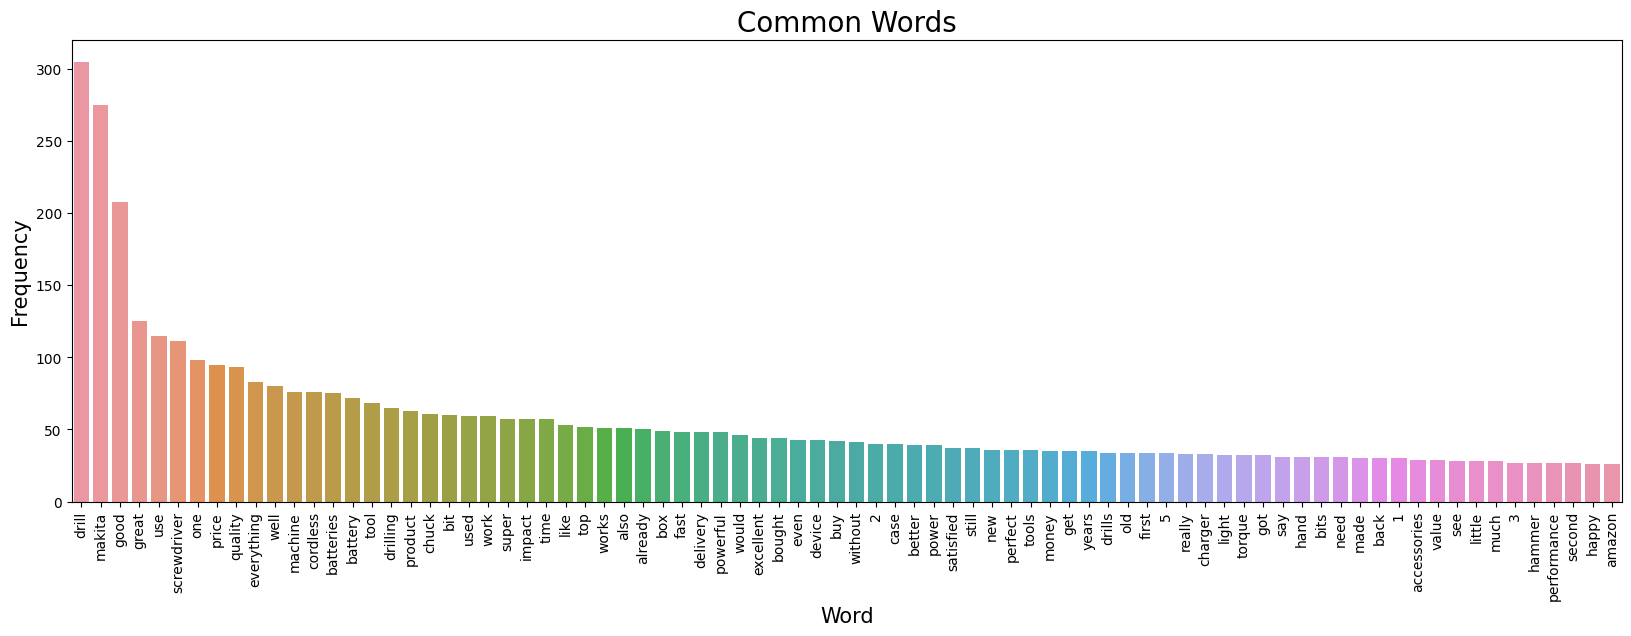

In [78]:
plt.figure(figsize=(20,6))
plt.title('Common Words', fontsize=20)
sns.barplot(x='Words', y='Frequencies', data=freq_words[:80])
plt.xticks(rotation=90)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [79]:
other_stopwords = ['5', '2', '1', '3', 's']

In [80]:
df['Translated_Noother'] = df['Translated_Nostop'].apply(
    lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

In [81]:
df.head()

,Review,Language,Translated,Word_Count,Char_Count,Stop-Words,Translated_Lower,Translated_Nopunc,Translated_Nostop,Translated_Noother
0,Ich hab das Set 3 mal bekommen . Das erste war...,de,I got the set 3 times. The first was broken af...,74,NaN,28,i got the set 3 times. the first was broken af...,i got the set 3 times the first was broken af...,got set 3 times first broken 5 months second o...,got set times first broken months second one d...
1,"Der Makita-Koffer hält, was er verspricht. Auc...",de,The Makita case keeps its promise. Even though...,70,NaN,28,the makita case keeps its promise. even though...,the makita case keeps its promise even though...,makita case keeps promise even though case lon...,makita case keeps promise even though case lon...
2,Ich hab den Koffer als Geschenk für meinen Man...,de,I ordered the case as a gift for my husband be...,99,NaN,47,i ordered the case as a gift for my husband be...,i ordered the case as a gift for my husband be...,ordered case gift husband already good experie...,ordered case gift husband already good experie...
3,Es ist bereits unser 3. Gerät dieser Sorte und...,de,It is already our third tool of this type and ...,36,NaN,18,it is already our third tool of this type and ...,it is already our third tool of this type and ...,already third tool type always delighted quali...,already third tool type always delighted quali...
4,Der gekaufte makita Akkuschrauber überzeugt mi...,de,The purchased makita cordless screwdriver conv...,75,NaN,31,the purchased makita cordless screwdriver conv...,the purchased makita cordless screwdriver conv...,purchased makita cordless screwdriver convince...,purchased makita cordless screwdriver convince...


In [82]:
freq_words = pd.Series(" ".join(df['Translated_Noother']).split()).value_counts().reset_index()

In [83]:
freq_words.columns = ['Words', 'Frequencies']

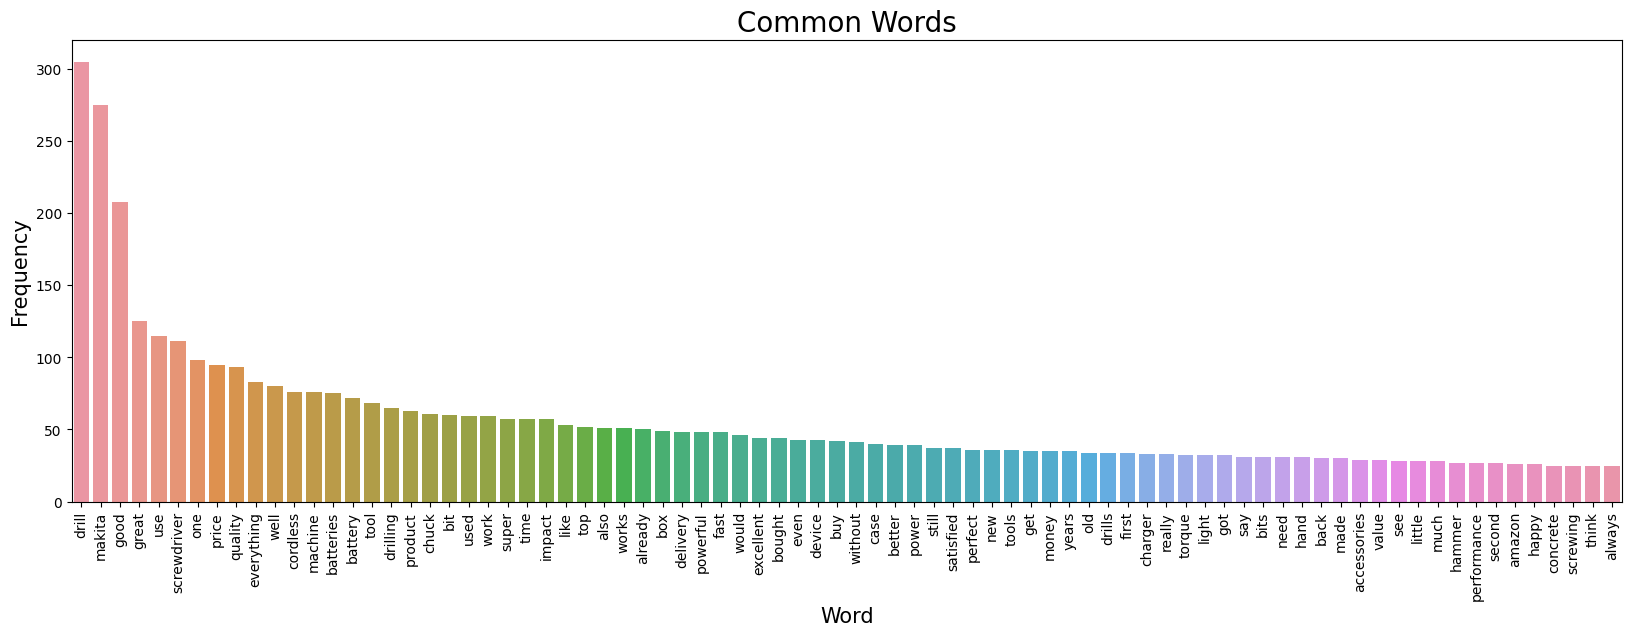

In [84]:
plt.figure(figsize=(20,6))
plt.title('Common Words', fontsize=20)
sns.barplot(x='Words', y='Frequencies', data=freq_words[:80])
plt.xticks(rotation=90)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [119]:
!pip install wordcloud

     ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00


In [120]:
from wordcloud import WordCloud

In [130]:
text = ''
for row in df.iterrows():
    review = row[1][2]
    for word in str(review).split():
        text = text + " " + word

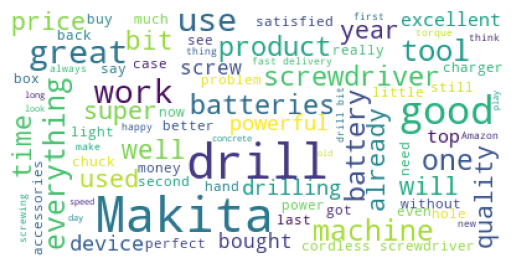

In [134]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=80,max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4.5 Lemmatize Reviews

In [85]:
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [90]:
df['Cleaned_Review'] = df['Translated_Noother'].apply(
    lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [92]:
print(df.iloc[1]['Translated_Noother'])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df.iloc[1]['Cleaned_Review'])

makita case keeps promise even though case longer described handy still compact robust everything place previously simple rock solid 14 4v branded tool home use difference 18v makita high torque noticeable build quality scope delivery good way delivery complete intact
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
makita case keep promise even though case longer described handy still compact robust everything place previously simple rock solid 14 4v branded tool home use difference 18v makita high torque noticeable build quality scope delivery good way delivery complete intact


# 5. Sentiment Analysis

In [93]:
from textblob import TextBlob

In [94]:
df['Polarity'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment[0])
df['Subjectivity'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment[1])

In [95]:
filtered_df = df[['Translated', 'Polarity', 'Subjectivity']]

In [96]:
filtered_df.head()

,Translated,Polarity,Subjectivity
0,I got the set 3 times. The first was broken af...,-0.050000,0.276667
1,The Makita case keeps its promise. Even though...,0.260000,0.482857
2,I ordered the case as a gift for my husband be...,0.429630,0.737037
3,It is already our third tool of this type and ...,0.350000,0.350000
4,The purchased makita cordless screwdriver conv...,0.502381,0.734524


In [97]:
filtered_df['Polarity'].max()

1.0

In [101]:
print(filtered_df[filtered_df['Polarity']==1].iloc[19]['Translated'])

Perfect size


In [102]:
filtered_df['Polarity'].min()

-0.8

In [116]:
print(filtered_df[filtered_df['Polarity']<=-0.7].iloc[0]['Translated'])

I have to admit that I am shocked.Some renovation work on the house and the gearbox on both Makitas is worn out and misaligned.No more concentricity and they smell as if they are about to burn.This has not happened to me with other manufacturers after 10 years.


In [117]:
df.to_csv('Data/Amazon-Sentiment.csv')

In [118]:
filtered_df['Polarity'].mean()

0.3254583864836841